
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


Using TensorFlow backend.


In [2]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
 
model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [4]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
__________

In [5]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''
opt=optimizers.Adam()

In [6]:
# 第三步：編譯, 
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)


In [8]:

'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 

batch_size= [512,1024]
epochs = [10,20]

In [10]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

history_assembly =[]
for batch in batch_size:
    for epoch in epochs:
        print(f'\n ecochs= {epoch} , batch_size= {batch} \n')
        history = model.fit(X_train,Y_train,batch_size = batch, epochs=epoch, shuffle=True,verbose=2,validation_split=0.3 )
        history_assembly.append(history)
        history = []


 ecochs= 10 , batch_size= 512 

Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 11s - loss: 2.5616 - acc: 0.8379 - val_loss: 2.6266 - val_acc: 0.8356
Epoch 2/10
 - 9s - loss: 2.6019 - acc: 0.8372 - val_loss: 2.8760 - val_acc: 0.8203
Epoch 3/10
 - 9s - loss: 2.8468 - acc: 0.8223 - val_loss: 2.8903 - val_acc: 0.8197
Epoch 4/10
 - 9s - loss: 2.8857 - acc: 0.8200 - val_loss: 2.8955 - val_acc: 0.8194
Epoch 5/10
 - 9s - loss: 2.8931 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 6/10
 - 8s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 7/10
 - 9s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 8/10
 - 7s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 9/10
 - 8s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194
Epoch 10/10
 - 8s - loss: 2.8932 - acc: 0.8195 - val_loss: 2.8956 - val_acc: 0.8194

 ecochs= 20 , batch_size= 512 

Trai

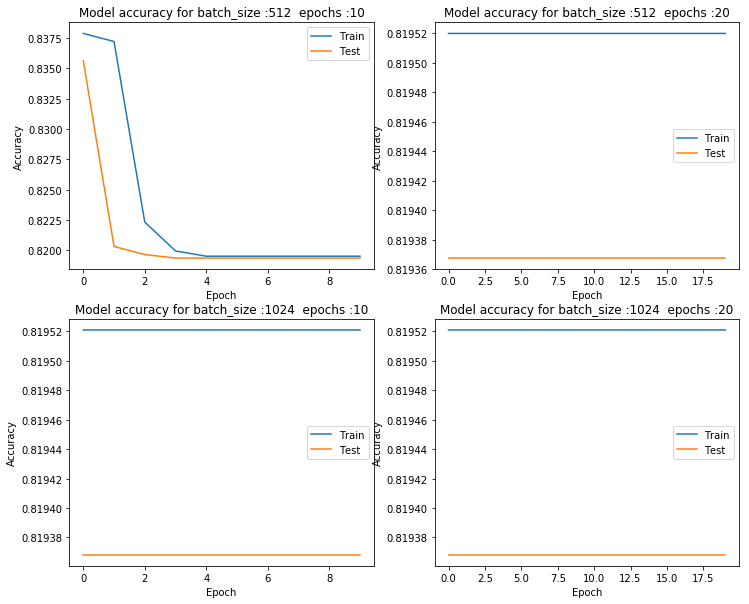

In [11]:
#    第六步：輸出
 
import matplotlib.pyplot as plt

%matplotlib inline

# Plot training & validation accuracy values
plt.figure(figsize=(12,10))
k=0
for i in range(2):
    for j in range(2):
        plt.subplot(2,2,k+1)
        plt.plot(history_assembly[k].history['acc'])
        plt.plot(history_assembly[k].history['val_acc'])
        plt.title('Model accuracy for ' + 'batch_size :'+ str(batch_size[i]) +'  epochs :' + str(epochs[j]))
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='best')
        k += 1
   
plt.show()

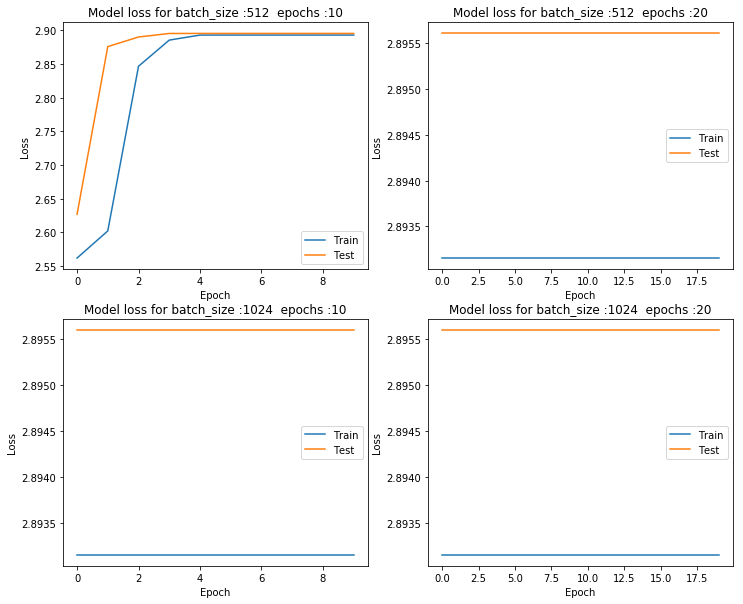

In [12]:
# Plot training & validation loss values
plt.figure(figsize=(12,10))

k = 0
for i in range(2):
    for j in range(2):
        plt.subplot(2,2,k+1)
        plt.plot(history_assembly[k].history['loss'])
        plt.plot(history_assembly[k].history['val_loss'])
        plt.title('Model loss for ' + 'batch_size :'+ str(batch_size[i]) +'  epochs :' + str(epochs[j]))
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='best')
        k+= 1
plt.show()


作業二 以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [13]:
def plot_output(history):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
         
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

In [14]:
def fit_model(model,opt):
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    history = model.fit(X_train,Y_train,batch_size = 512, epochs=20, shuffle=True,verbose=2,validation_split=0.3 )
    return history

In [15]:
model = Sequential()

model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 10s - loss: 1.4848 - acc: 0.8927 - val_loss: 2.5478 - val_acc: 0.8347
Epoch 2/20
 - 6s - loss: 0.4481 - acc: 0.9626 - val_loss: 2.2037 - val_acc: 0.8543
Epoch 3/20
 - 6s - loss: 0.3446 - acc: 0.9713 - val_loss: 0.8087 - val_acc: 0.9383
Epoch 4/20
 - 6s - loss: 0.1692 - acc: 0.9841 - val_loss: 0.1473 - val_acc: 0.9858
Epoch 5/20
 - 6s - loss: 0.1208 - acc: 0.9878 - val_loss: 0.1343 - val_acc: 0.9860
Epoch 6/20
 - 6s - loss: 0.0972 - acc: 0.9897 - val_loss: 0.5974 - val_acc: 0.9534
Epoch 7/20
 - 6s - loss: 0.0966 - acc: 0.9901 - val_loss: 0.3723 - val_acc: 0.9660
Epoch 8/20
 - 5s - loss: 0.0759 - acc: 0.9917 - val_loss: 0.1298 - val_acc: 0.9859
Epoch 9/20
 - 6s - loss: 0.0605 - acc: 0.9932 - val_loss: 0.1062 - val_acc: 0.9881
Epoch 10/20
 - 5s - loss: 0.0517 - acc: 0.9942 - val_loss: 0.1052 - val_acc: 0.9883
Epoch 11/20
 - 5s - loss: 0.0446 - acc: 0.9950 - val_loss: 0.2770 - val_acc: 0.9725
Epoch 12/20
 - 6s - loss: 0.0470 -

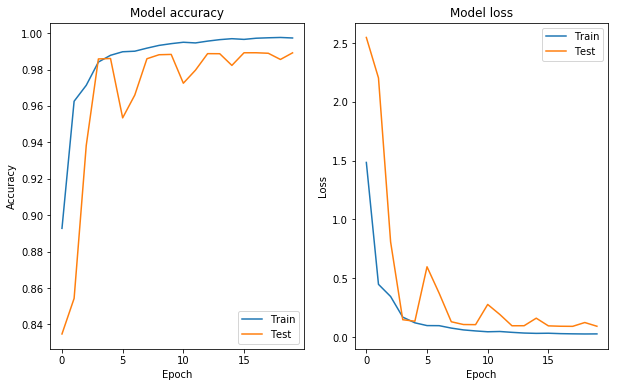

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 9s - loss: 0.4656 - acc: 0.9627 - val_loss: 0.3426 - val_acc: 0.9684
Epoch 2/20
 - 5s - loss: 0.2610 - acc: 0.9717 - val_loss: 0.2263 - val_acc: 0.9722
Epoch 3/20
 - 4s - loss: 0.1805 - acc: 0.9788 - val_loss: 0.0616 - val_acc: 0.9861
Epoch 4/20
 - 4s - loss: 0.0277 - acc: 0.9931 - val_loss: 0.0381 - val_acc: 0.9907
Epoch 5/20
 - 4s - loss: 0.0134 - acc: 0.9962 - val_loss: 0.0345 - val_acc: 0.9918
Epoch 6/20
 - 5s - loss: 0.0171 - acc: 0.9954 - val_loss: 0.0396 - val_acc: 0.9911
Epoch 7/20
 - 4s - loss: 0.0080 - acc: 0.9977 - val_loss: 0.0338 - val_acc: 0.9928
Epoch 8/20
 - 4s - loss: 0.0061 - acc: 0.9983 - val_loss: 0.0353 - val_acc: 0.9927
Epoch 9/20
 - 4s - loss: 0.0051 - acc: 0.9985 - val_loss: 0.0353 - val_acc: 0.9930
Epoch 10/20
 - 4s - loss: 0.0042 - acc: 0.9989 - val_loss: 0.0366 - val_acc: 0.9930
Epoch 11/20
 - 4s - loss: 0.0043 - acc: 0.9989 - val_loss: 0.0357 - val_acc: 0.9930
Epoch 12/20
 - 4s - loss: 0.0045 - 

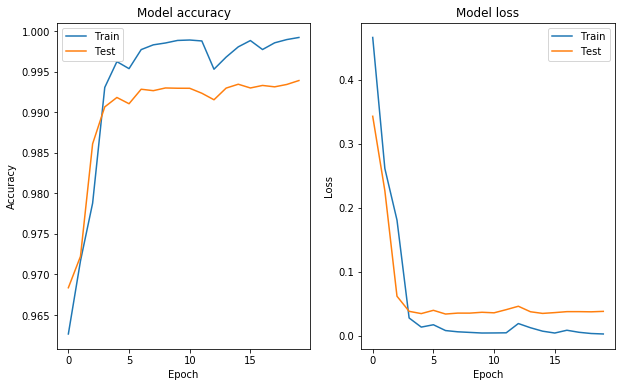

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 5s - loss: 0.0407 - acc: 0.9943 - val_loss: 0.0517 - val_acc: 0.9924
Epoch 2/20
 - 4s - loss: 0.0203 - acc: 0.9962 - val_loss: 0.0620 - val_acc: 0.9909
Epoch 3/20
 - 4s - loss: 0.0213 - acc: 0.9962 - val_loss: 0.0432 - val_acc: 0.9937
Epoch 4/20
 - 4s - loss: 0.0159 - acc: 0.9969 - val_loss: 0.0495 - val_acc: 0.9928
Epoch 5/20
 - 4s - loss: 0.0171 - acc: 0.9969 - val_loss: 0.0690 - val_acc: 0.9893
Epoch 6/20
 - 4s - loss: 0.0144 - acc: 0.9974 - val_loss: 0.0642 - val_acc: 0.9924
Epoch 7/20
 - 4s - loss: 0.0153 - acc: 0.9974 - val_loss: 0.0527 - val_acc: 0.9931
Epoch 8/20
 - 4s - loss: 0.0161 - acc: 0.9972 - val_loss: 0.0728 - val_acc: 0.9918
Epoch 9/20
 - 4s - loss: 0.0159 - acc: 0.9975 - val_loss: 0.0665 - val_acc: 0.9926
Epoch 10/20
 - 4s - loss: 0.0163 - acc: 0.9976 - val_loss: 0.0616 - val_acc: 0.9929
Epoch 11/20
 - 4s - loss: 0.0191 - acc: 0.9974 - val_loss: 0.0566 - val_acc: 0.9940
Epoch 12/20
 - 4s - loss: 0.0182 - 

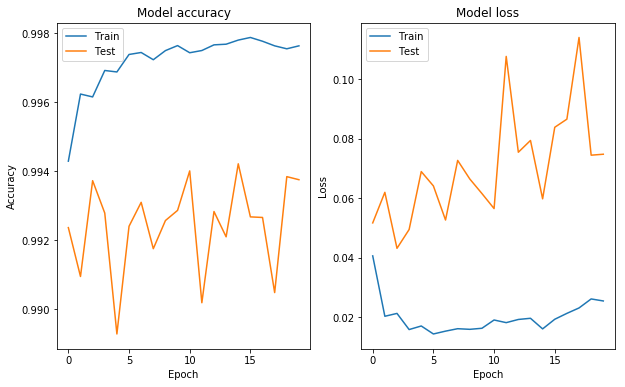

In [16]:
opts=['SGD','Adam','Rmsprop']

for opt in opts:
    history = fit_model(model,opt)
    plot_output(history)